**PROJECT TEAM ID**: PTID-CDS-DEC-23-1712  
**PROJECT CODE**   : PRCP-1024-TexasSalaryPred   
**PROJECT NAME**   : Texas Employee Salary prediction

## Task 1:-Prepare a complete data analysis report on the given data.

# Business Case

* The state of Texas manages a diverse workforce across 113 agencies, and efficient payroll management is crucial for budgeting and resource allocation.
* The TexasSalaryPrediction project aims to address critical challenges related to payroll management for the Texas state government.
* The primary goal of the TexasSalaryPrediction project is to provide the Texas state government with advanced insights into employee salaries through comprehensive data analysis and the development of a predictive model.
* The tasks involve comprehensive data analysis, the development of a predictive model for salary estimation, and addressing specific questions regarding outliers, wage disparities, and changes in salaries over time.


## Domain Analysis  

1. **AGENCY:** An entity or organization providing specific services on behalf of another business, individual, or group.

2. **AGENCY NAME:** The entity or factor through which power is wielded or goals are achieved.

3. **LAST NAME:** The surname of an individual as recorded.

4. **FIRST NAME:** The given name of an individual as recorded.

5. **MI:** Middle initial.

6. **CLASS CODE:** Codes established prior to the addition of employees to the system for payroll processing.

7. **CLASS TITLE:** The official designation used for personnel and payroll processes.

8. **ETHNICITY:** The quality or fact of belonging to a population group with a common cultural background or descent.

9. **GENDER:** The range of characteristics distinguishing between femininity and masculinity.

10. **STATUS:** Position or rank relative to others.

11. **EMPLOYEE DATE:** The date when an individual joined.

12. **HRLY RATE:** The amount charged, paid, or earned for every hour worked.

13. **HRS PER WEEK:** The typical number of hours an employee works in a week.

14. **MONTHLY:** The salary an individual receives each month from their employer.

15. **ANNUAL:** The total amount earned from a job in a year.

16. **STATE NUMBER:** A unique identifier assigned to a business or organization by the state.

17. **DUPLICATED:** One of two or more identical things.

18. **MULTIPLE FULL-TIME JOBS:** Engagement in one or more full-time positions.

19. **COMBINED MULTIPLE JOBS:** Merging two or more jobs from the same market view into a single job.

20. **SUMMED ANNUAL SALARY:** The total earnings by an individual in a year, considering multiple full-time jobs and combined multiple jobs.

21. **HIDE FROM SEARCH:** An option to keep web searches confidential with respect to the organization.




In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
#importing the salary csv file
df = pd.read_csv('salary.csv')
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


## Basic Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [4]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [7]:
'''We are standardizing the column names by eliminating capital letters and spaces between words. This approach aims to mitigate
potential issues that may arise during dataset manipulation. The uniformity in column names enhances consistency and facilitates
smoother data handling in subsequent analysis.'''


df.rename({'AGENCY':'agency', 'AGENCY NAME':'agency_name', 'LAST NAME':'last_name', 'FIRST NAME':'first_name', 'MI':'middle_name', 'CLASS CODE':'class_code',
       'CLASS TITLE':'class_title', 'ETHNICITY':'ethnicity', 'GENDER':'gender', 'STATUS':'status', 'EMPLOY DATE':'employ_date',
       'HRLY RATE':'hrly_rate', 'HRS PER WK':'hrs_per_week', 'MONTHLY':'monthly', 'ANNUAL':'annual', 'STATE NUMBER':'state_number'},axis=1,inplace=True)

In [8]:
df.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'middle_name',
       'class_code', 'class_title', 'ethnicity', 'gender', 'status',
       'employ_date', 'hrly_rate', 'hrs_per_week', 'monthly', 'annual',
       'state_number', 'duplicated', 'multiple_full_time_jobs',
       'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [9]:
df.describe()

,agency,hrly_rate,hrs_per_week,monthly,annual,state_number,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [10]:
df.describe(include='O')

,agency_name,last_name,first_name,middle_name,class_code,class_title,ethnicity,gender,status,employ_date,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [11]:
#To know how many unique values are there in each column
for i in df:
    print(i   ,"----------",df[i].nunique())

agency ---------- 113
agency_name ---------- 113
last_name ---------- 38675
first_name ---------- 23559
middle_name ---------- 27
class_code ---------- 1481
class_title ---------- 1422
ethnicity ---------- 6
gender ---------- 2
status ---------- 11
employ_date ---------- 6295
hrly_rate ---------- 206
hrs_per_week ---------- 58
monthly ---------- 40552
annual ---------- 40554
state_number ---------- 149465
duplicated ---------- 1
multiple_full_time_jobs ---------- 1
combined_multiple_jobs ---------- 1
summed_annual_salary ---------- 15
hide_from_search ---------- 1


In [12]:
#We are removing columns with a single unique value to enhance the dataset's efficiency, as these columns lack meaningful variation for analysis.
df.drop(['duplicated', 'combined_multiple_jobs','hide_from_search'],axis=1,inplace=True)

In [13]:
#We are dropping a column with zero standard deviation as it lacks variability and provides no meaningful information for analysis.
df.drop('multiple_full_time_jobs',axis=1,inplace=True)

In [14]:
#We are droping these columns since there is no relation with target variable.
df.drop([ 'last_name', 'first_name', 'middle_name'],axis=1,inplace=True)

In [15]:
df.isnull().sum()

agency                       0
agency_name                  0
class_code                   0
class_title                  0
ethnicity                    0
gender                       0
status                       0
employ_date                  0
hrly_rate                    0
hrs_per_week                 0
monthly                      0
annual                       0
state_number                 0
summed_annual_salary    149465
dtype: int64

In [16]:
#As this columns have more than 95% of them are null values,we will ignore them.
df.drop('summed_annual_salary',axis=1,inplace=True)

In [17]:
#For particular AGENCY_NAME code there is unique AGENCY so, we are dropping AGENCY.
df.drop(['agency'],axis=1,inplace=True)

In [18]:
df.columns

Index(['agency_name', 'class_code', 'class_title', 'ethnicity', 'gender',
       'status', 'employ_date', 'hrly_rate', 'hrs_per_week', 'monthly',
       'annual', 'state_number'],
      dtype='object')

## Exploratory Data Analyis
* Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing a dataset. Its primary objective is to use a combination of statistical and graphical techniques to uncover patterns, relationships, anomalies, and potential insights within the data. Through EDA, analysts can form hypotheses, detect data quality issues, and make informed decisions about the subsequent stages of the analysis pipeline. By leveraging descriptive statistics, visualizations, and exploratory techniques, EDA establishes a foundational understanding that paves the way for more advanced analyses and modeling.

### Univariate Analysis
* Univariate Analysis is centered on exploring and summarizing the characteristics of an individual variable within a dataset. Its primary aim is to gain insights into the distribution and central tendency of that specific variable.

**Histogram:**

* Description: A histogram is a visual tool that illustrates the distribution of a continuous dataset by dividing it into bins or intervals.  
* Components:
    - Vertical bars represent the frequency or count of observations within each bin.
    - Bins categorize data points based on their values.
    - The shape of the histogram provides insights into the data distribution, including aspects like skewness or kurtosis.  

**Countplot:**  

* Description: A countplot is a variation of a bar plot designed to display the counts of observations within different categories of a categorical variable.
* Components:
    - Vertical bars represent the occurrence counts for each category.
    - It is especially beneficial for visualizing the distribution of categorical data, offering a straightforward way to observe and compare the frequencies of different categories.

In [19]:
df.columns

Index(['agency_name', 'class_code', 'class_title', 'ethnicity', 'gender',
       'status', 'employ_date', 'hrly_rate', 'hrs_per_week', 'monthly',
       'annual', 'state_number'],
      dtype='object')

In [20]:
df1=df[[ 'ethnicity', 'gender', 'status']]

In [21]:
df2=df[['agency_name', 'class_title','hrly_rate', 'hrs_per_week', 'monthly', 
       'state_number']]

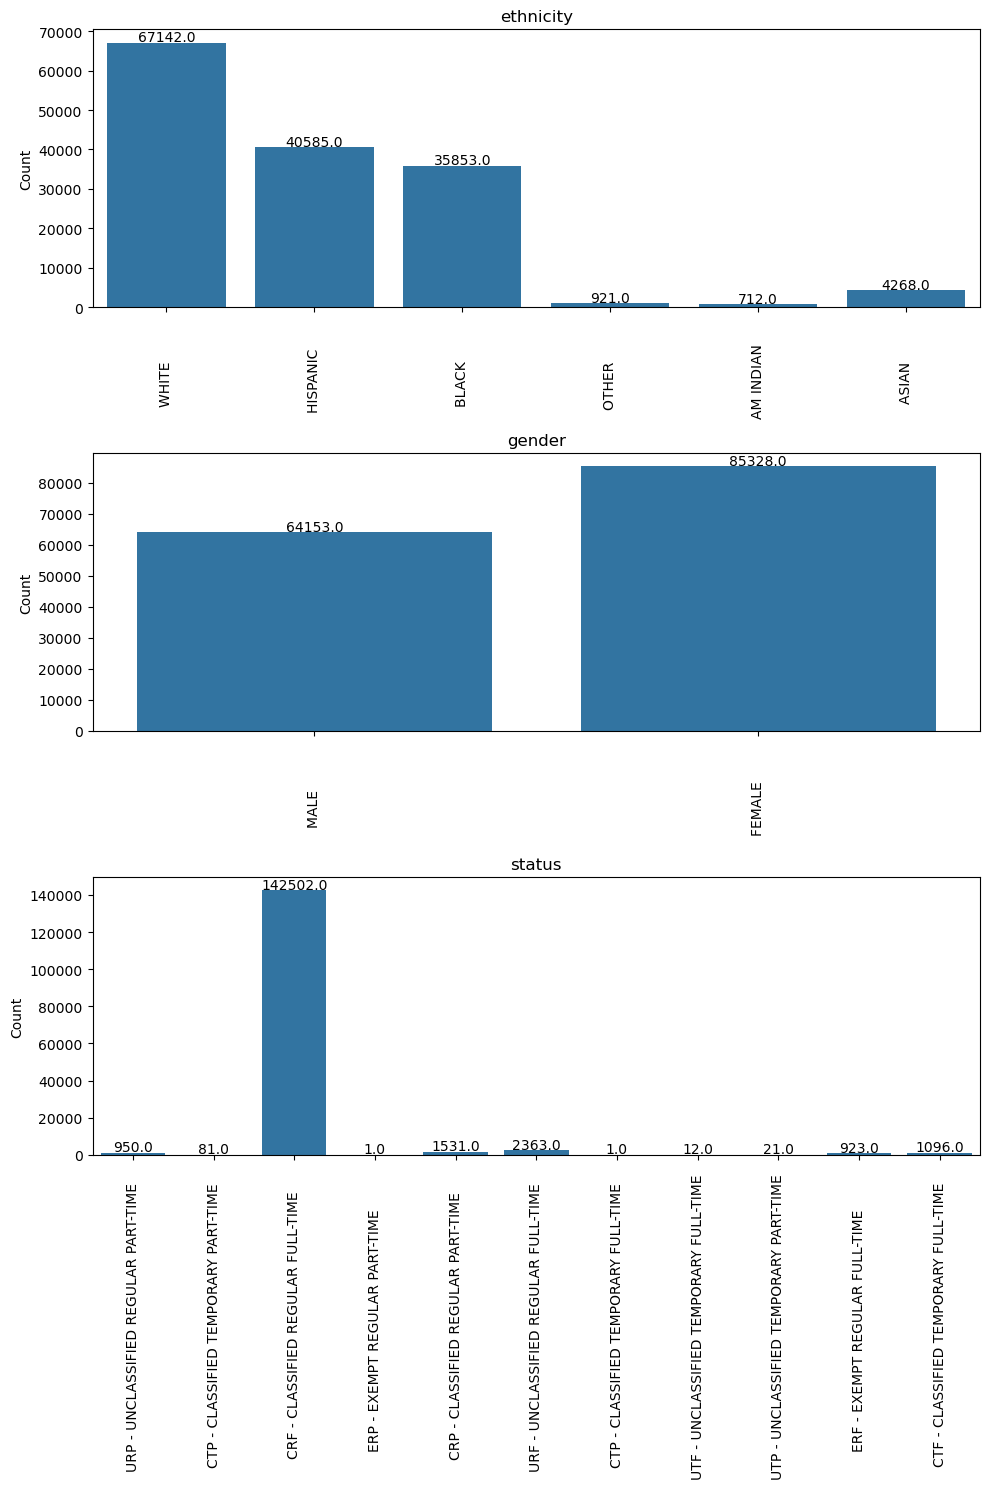

In [22]:
plt.figure(figsize=(10, 15))
plotnumber = 1
for i in df1.columns:  
    ax = plt.subplot(3, 1, plotnumber)
    sns.countplot(x=df1[i], data=df1)  

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

    plt.xlabel('')  
    plt.ylabel('Count')  
    plt.title(i, loc='center')  
    plt.xticks(rotation=90)
    plotnumber += 1

plt.tight_layout()
plt.show()

### **Insights:**  
**Ethnicity :** The WHITE demographic constitutes a significant majority of employees, accounting for 44.91% of the total workforce.   
**Gender :** The representation of females is approximately 14.17% higher than that of male employees.  
**Status :** A majority of individuals, specifically 95.31%, are employed in the category of CRF - CLASSIFIED_REGULAR_FULL_TIME.

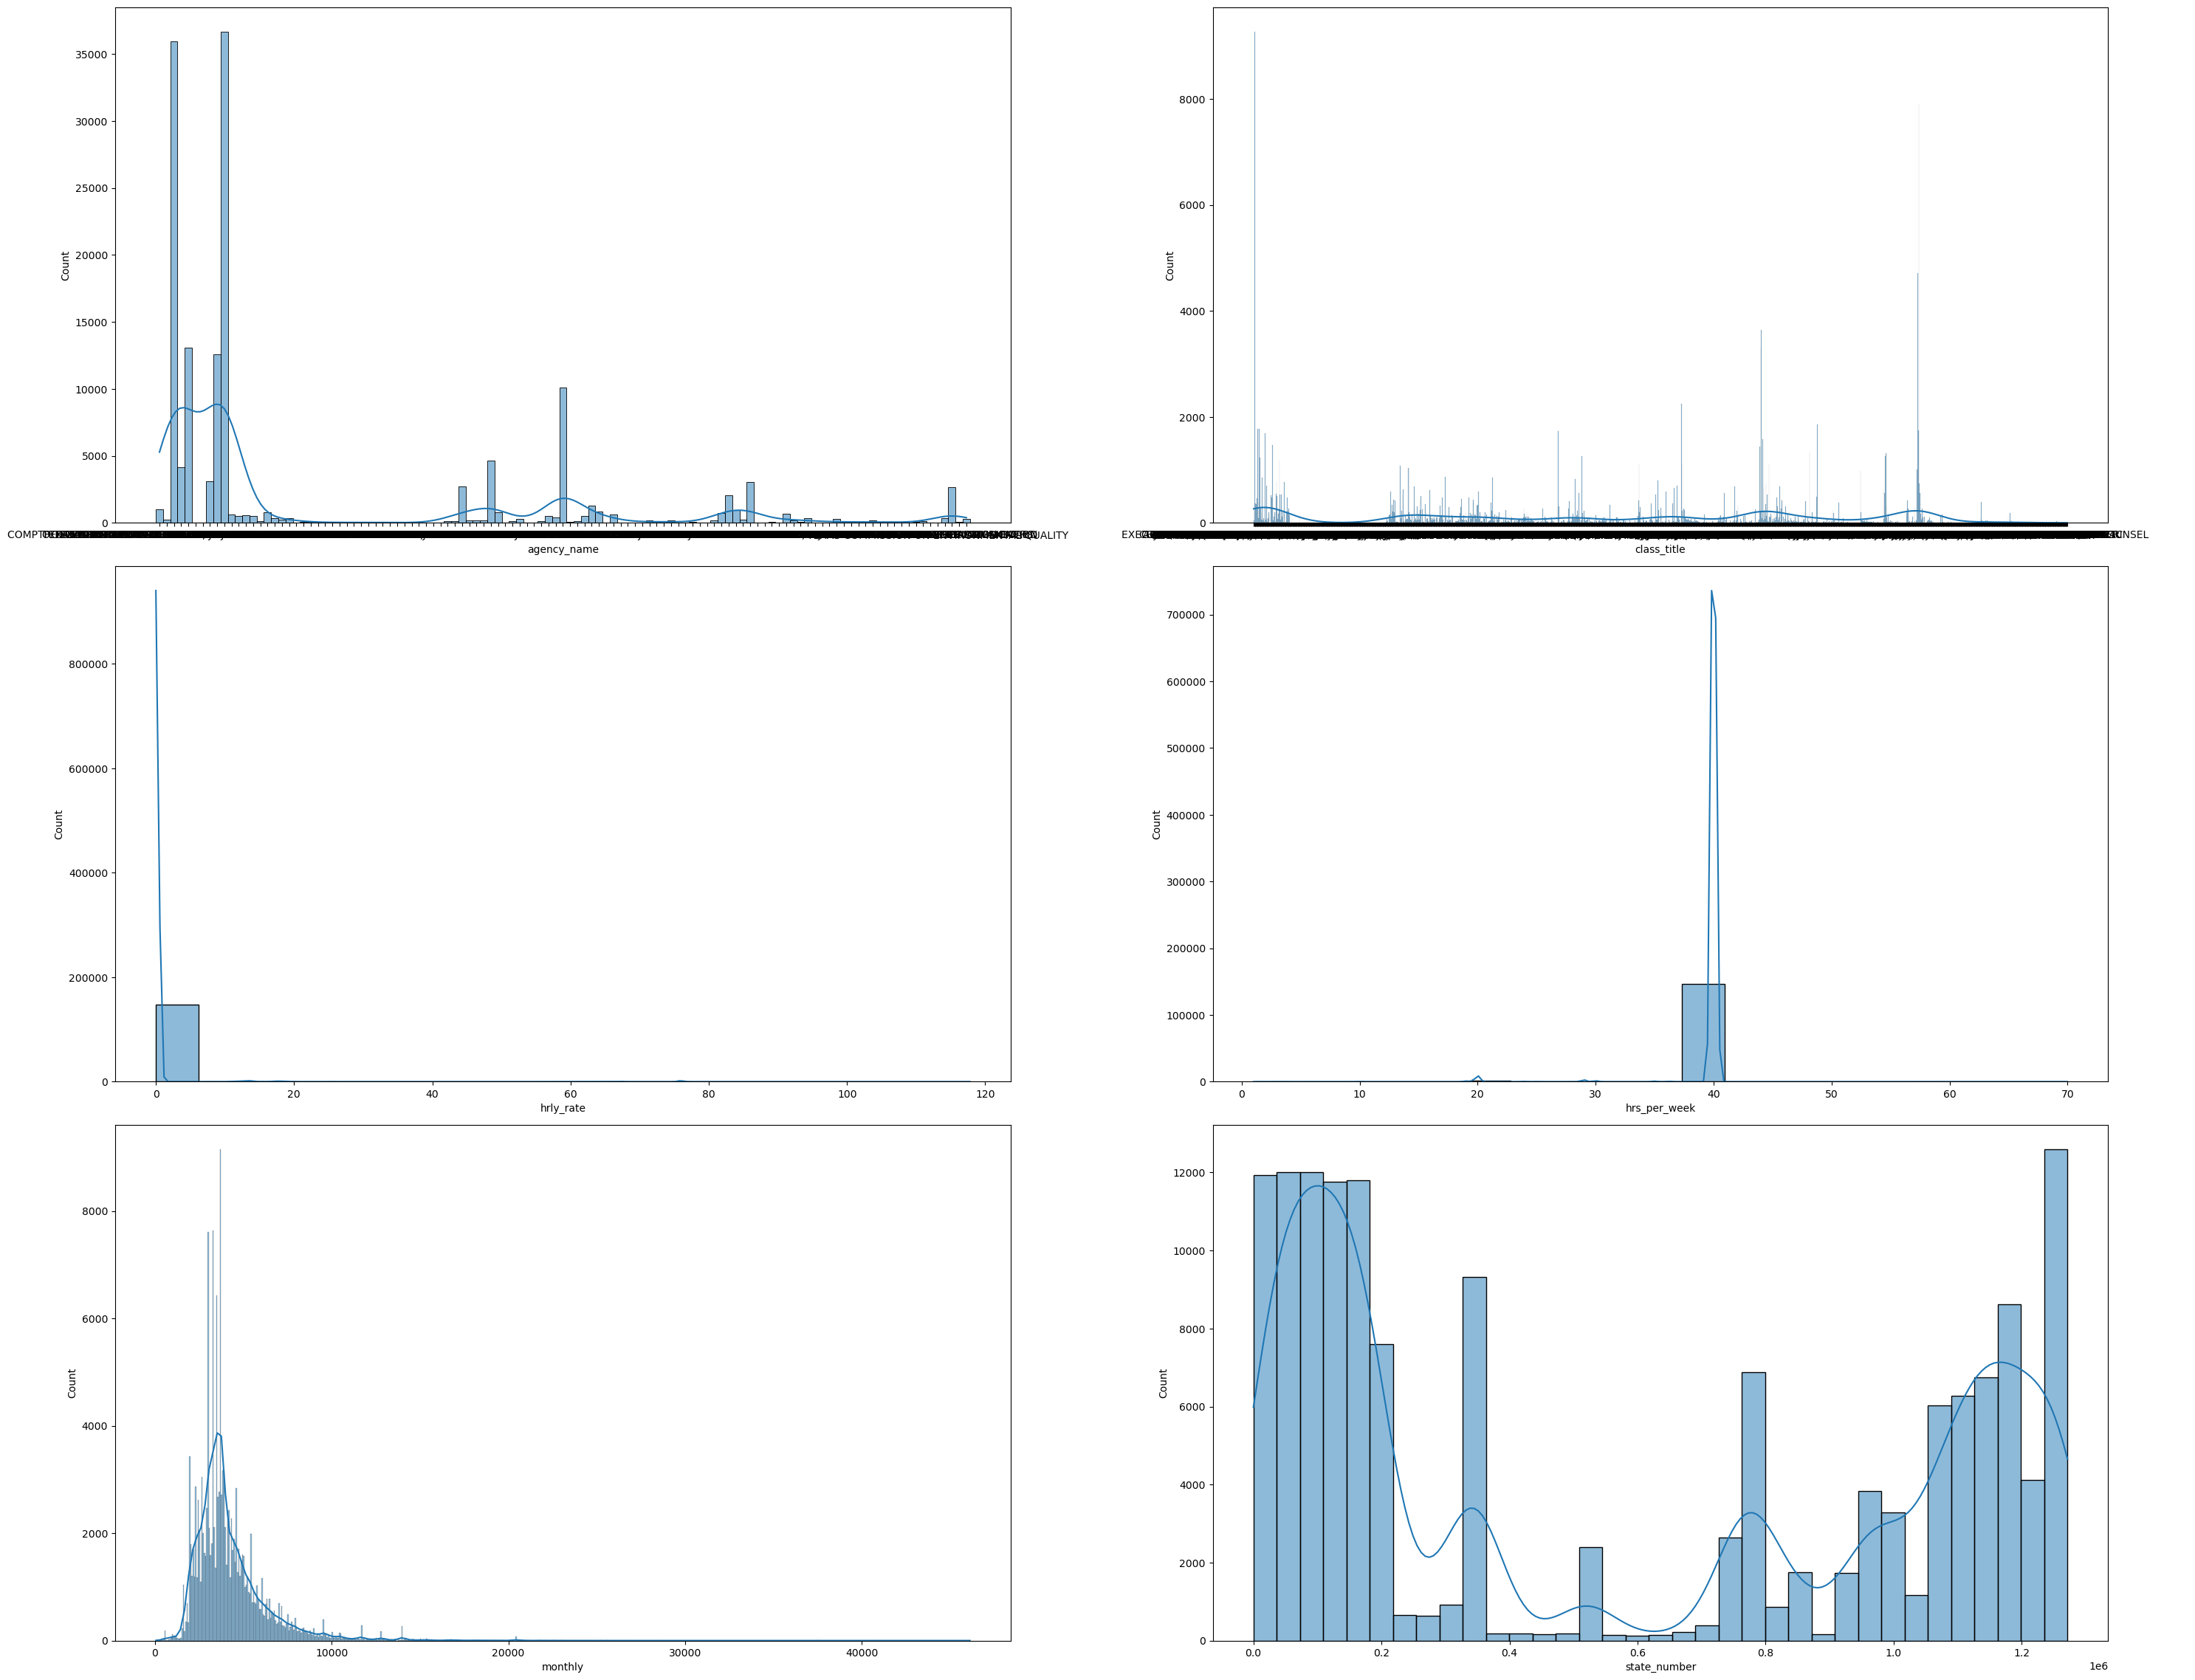

In [23]:
plt.figure(figsize=(30,30))

plotnumber = 1
for i in df2.columns:
    plt.subplot(4, 2, plotnumber)
    ax = sns.histplot(x=df2[i],kde=True)
    plotnumber += 1

plt.tight_layout()
plt.show()

### Insights:

* These graphs do not provide substantial insights as AGENCY_NAME and CLASS_TITLE exhibit limited variations.  
* MONTHLY display a right-skewed distribution.    
* The majority of employees receive an HRLY_RATE within the 0-8 dollar range.
* Most employees earn less than 10,000 dollar MONTHLY.
* The majority of employees work an average of 40 HR_PER_WEEK.

### Bivariate Analysis
* Bivariate analysis involves the analysis of two variables to understand the relationships between them. It helps to explore the interactions and associations between pairs of variables.  

**Scatter Plots** are used for visualizing relationships between two continuous variables.  
**Barplots** specifically use bars to represent the counts or proportions of categories in categorical data, providing a straightforward comparison.   

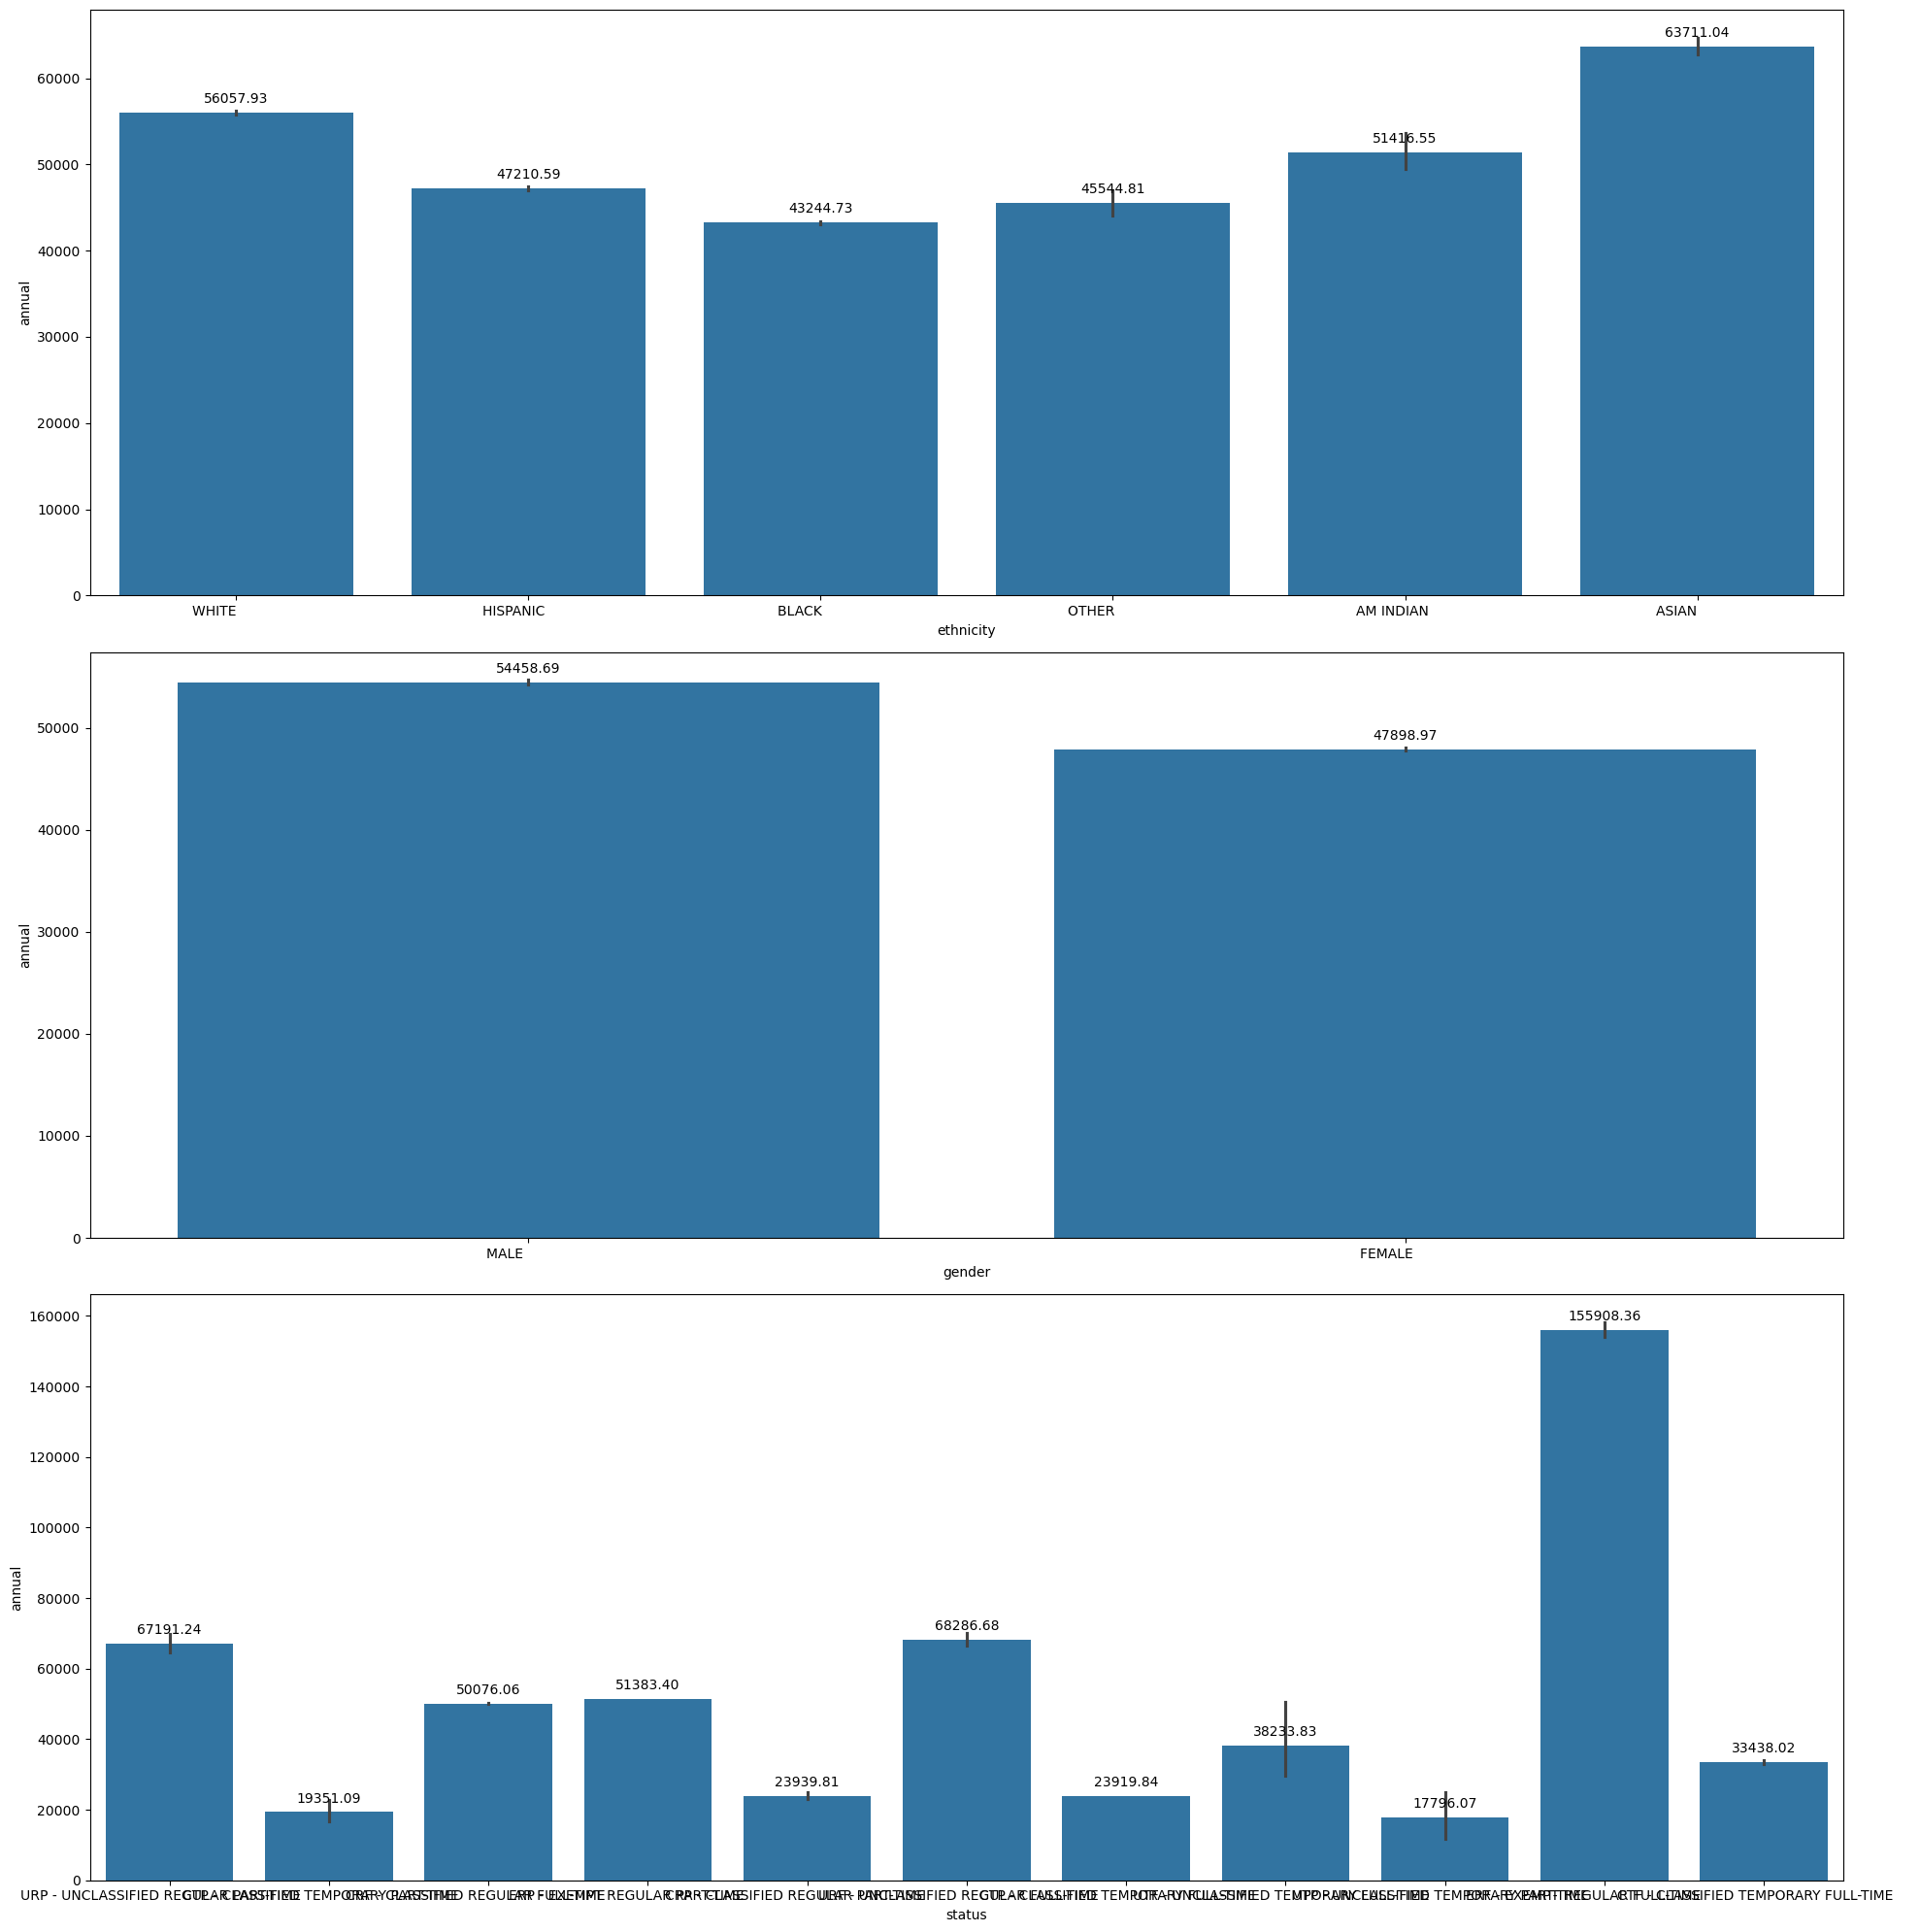

In [24]:
plt.figure(figsize=(20, 20))
plotnumber = 1

for i in df1.columns: 
    plt.subplot(3, 1, plotnumber)
    
    
    ax = sns.barplot(x=df1[i], y=df['annual'])
   
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plotnumber += 1

plt.tight_layout()
plt.show()

### Insights:
* People of Asian descent are earning higher salaries compared to others.
* Male employees are receiving a salary that is 6.414% higher than their female counterparts.
* ERF - EXEMPT REGULAR FULL-TIME individuals, comprising 0.617%, receive higher salaries than the rest of the employees.

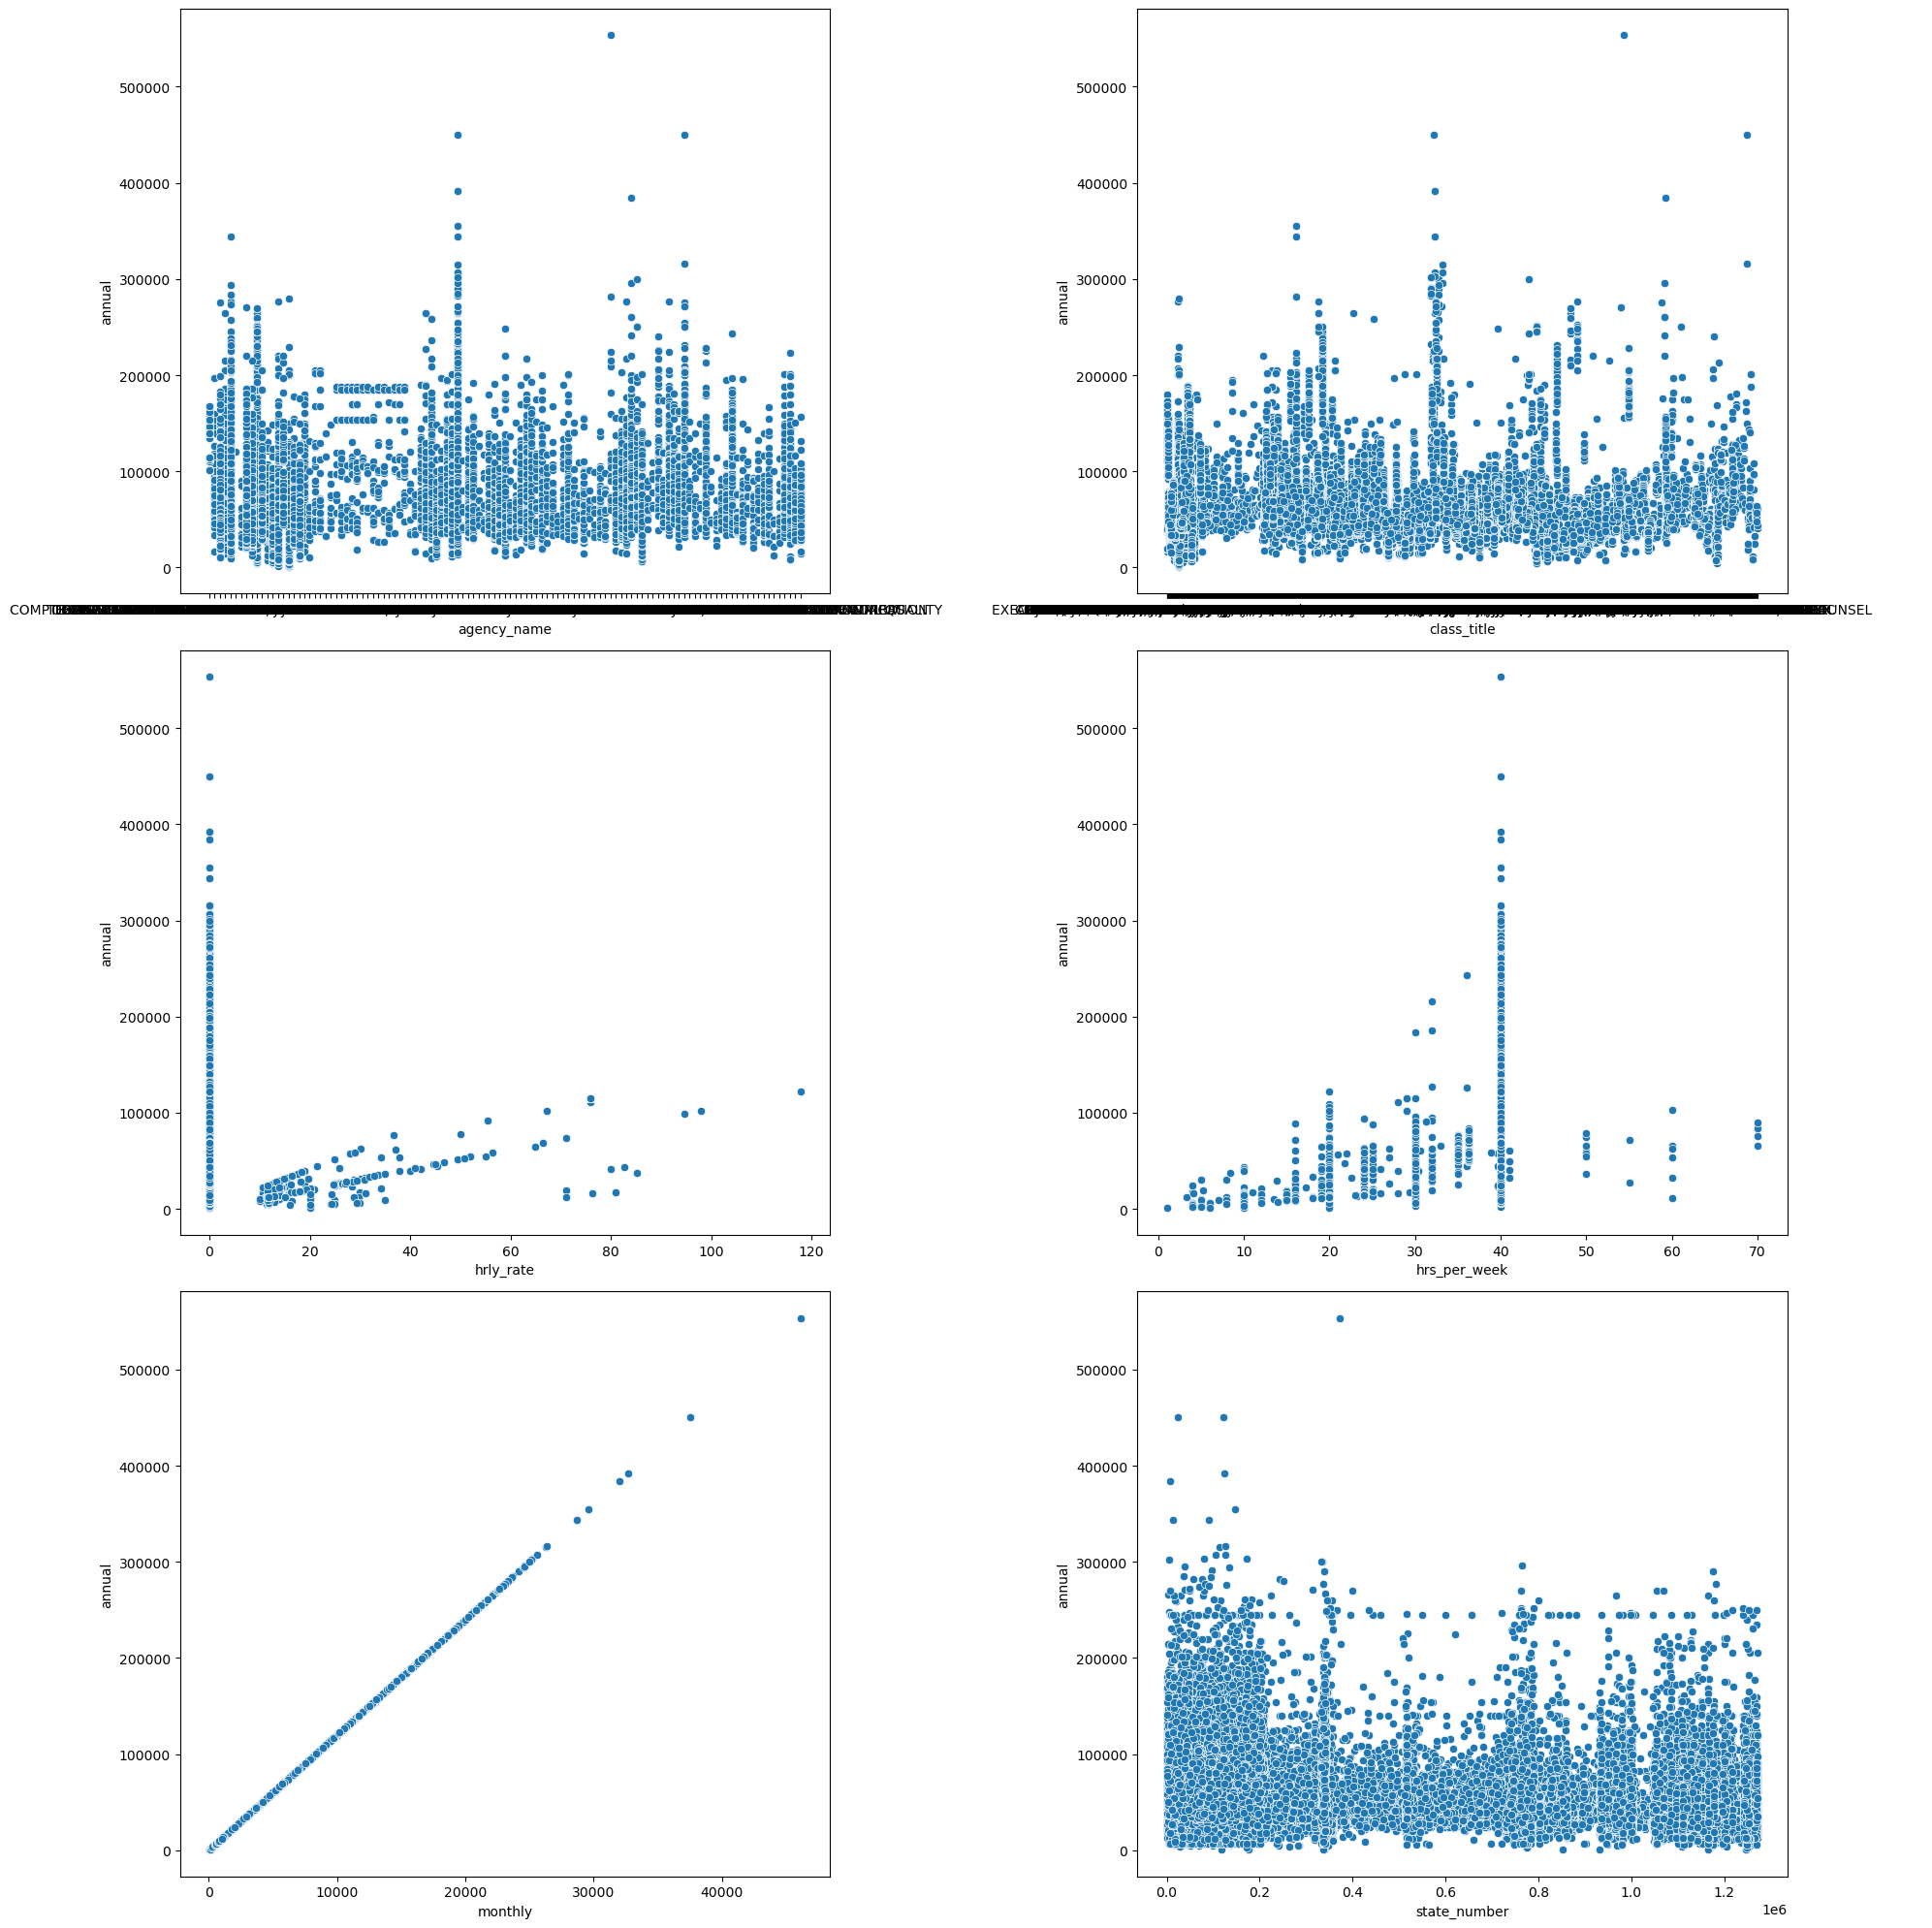

In [25]:
plt.figure(figsize=(20, 20))
plotnumber = 1

for i in df2.columns:  
    plt.subplot(3, 2, plotnumber)
    
    
    sns.scatterplot(x=df2[i], y=df['annual'])
    
    plotnumber += 1

plt.tight_layout()
plt.show()

*Insights*:
* The graph does not provide any insights from the attributes agent_name and class_title. 
* The majority of hourly rates fall within the range of 10 to 35, with an annual income reaching a maximum of 100,000 dollars.
* Individuals working approximately 30-40 hours per week receive higher salaries compared to their counterparts.  
* Among employees with the same STATE_NUMBER, only one has an annual salary exceeding 500,000 dollars, while the majority earn less than 300,000 dollars annually.
* The scatter plot strongly suggests complete collinearity between the 'annual' and 'monthly' variables, leading us to remove 'monthly' from further analysis.

In [26]:
'''The scatter plot above indicates a full 100% collinearity between the annual and monthly variables. Hence, 
as a result, we've chosen to omit the monthly variable from any subsequent analysis.'''

df.drop('monthly',axis=1,inplace=True)

### DATA PREPROCESSING

##### HANDLING WITH NULL VALUES

In [27]:
df.isnull().sum()

agency_name     0
class_code      0
class_title     0
ethnicity       0
gender          0
status          0
employ_date     0
hrly_rate       0
hrs_per_week    0
annual          0
state_number    0
dtype: int64

**As there are no null values present in the dataset, there is no requirement for handling null values.**

### Handling with Outliers

In [28]:
df_num=df[['hrly_rate', 'hrs_per_week']]

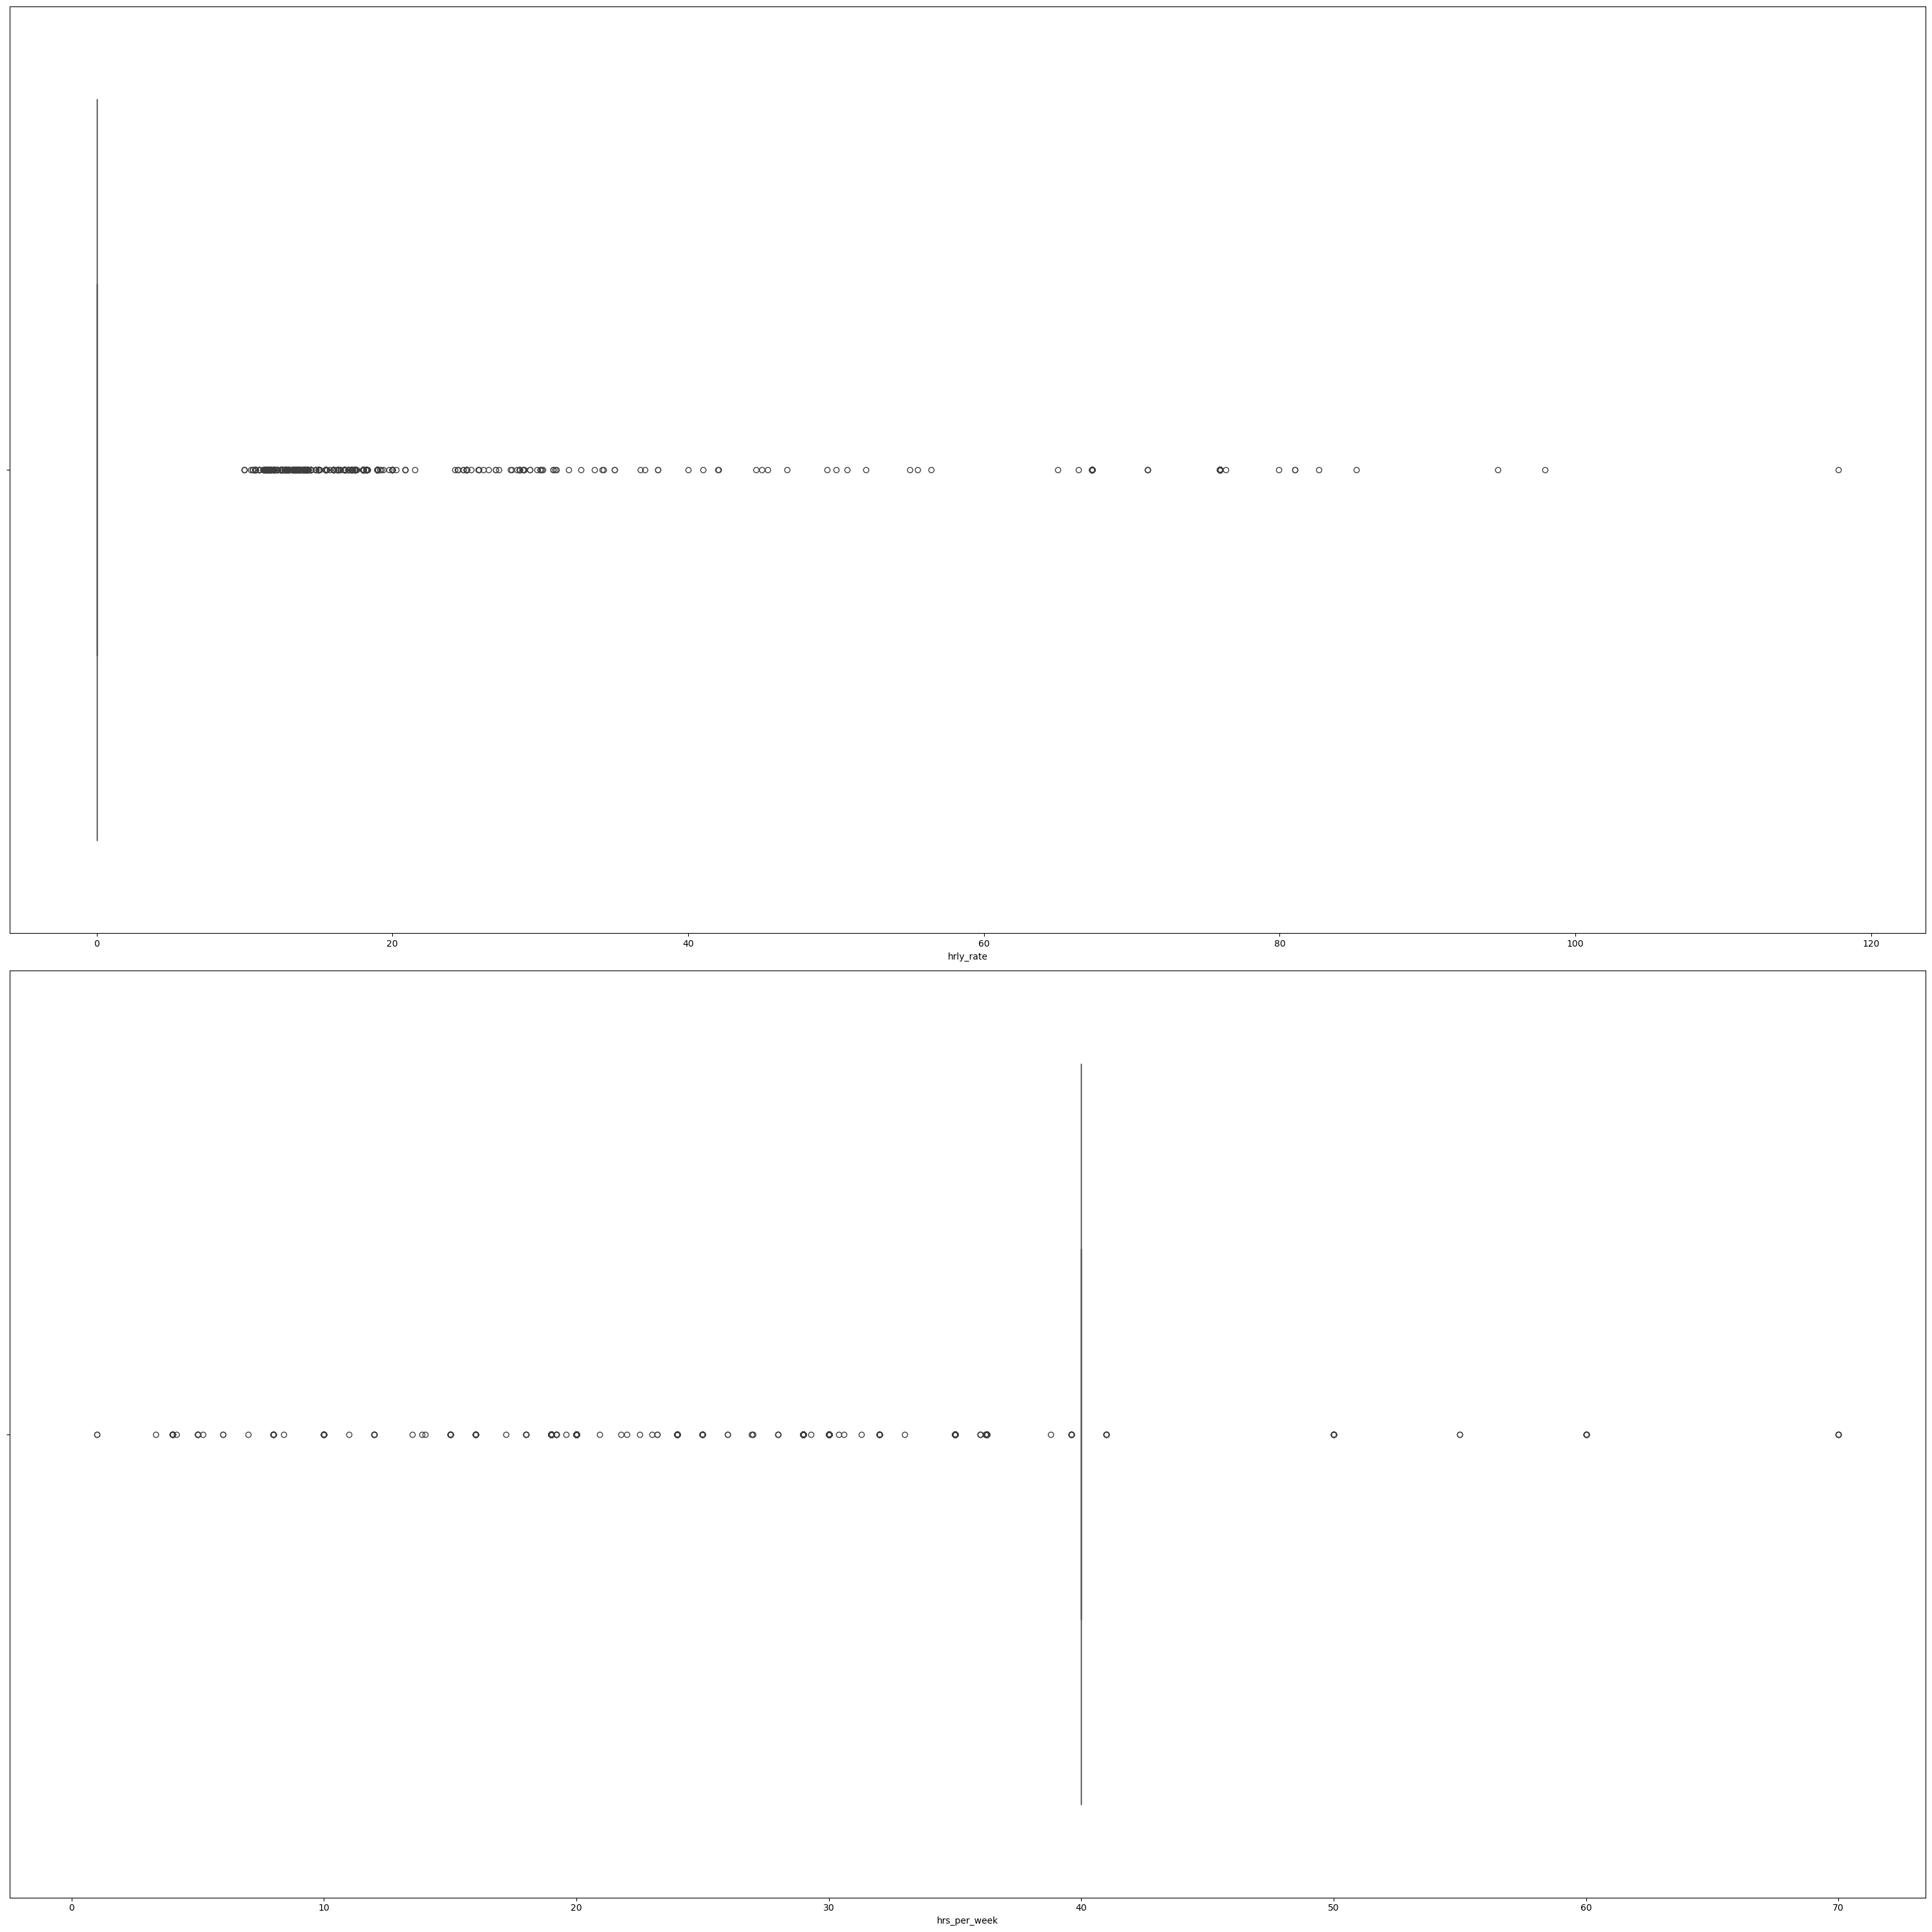

In [29]:
plt.figure(figsize=(30,30))

plotnumber = 1
for i in df_num:
    plt.subplot(2, 1, plotnumber)
    ax = sns.boxplot(x=df[i])
    plotnumber += 1

plt.tight_layout()
plt.show()

**Upon observing the box plot and noting the presence of numerous outliers, it seems unnecessary to address these outliers in this particular case.**

### HANDLING EMPLOY_DATE COLUMN

In [30]:
#  Converting object dtype date to datetime dtype
from datetime import datetime as dt
df['employ_date'] = pd.to_datetime(df['employ_date'])

In [31]:
df

,agency_name,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_week,annual,state_number
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,16857.24,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,114549.84,59115
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,16857.24,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-30,0.00000,40.0,34788.00,770781
149477,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2015-07-13,0.00000,40.0,66000.00,847431
149478,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,2012-10-15,12.93000,20.0,13447.20,34266
149479,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1989-09-22,0.00000,40.0,68929.92,123490


In [32]:
# Fetching today's date and removing time stamp(converting time to zeros)
import datetime as dt
df['cur_yr']=dt.datetime.combine(dt.date.today(), dt.datetime.min.time())

In [33]:
df

,agency_name,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_week,annual,state_number,cur_yr
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,114549.84,127717,2023-12-28
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,16857.24,127717,2023-12-28
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,114549.84,59115,2023-12-28
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,16857.24,59115,2023-12-28
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,39411.24,165030,2023-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-30,0.00000,40.0,34788.00,770781,2023-12-28
149477,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2015-07-13,0.00000,40.0,66000.00,847431,2023-12-28
149478,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,2012-10-15,12.93000,20.0,13447.20,34266,2023-12-28
149479,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1989-09-22,0.00000,40.0,68929.92,123490,2023-12-28


In [34]:
# We are subtracting Current year with EMPLOY_DATE and applying it to lambda function to calculate years for each record.
df['yrs']=((df.cur_yr)-(df.employ_date)).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)

In [35]:
df

,agency_name,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_week,annual,state_number,cur_yr,yrs
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,114549.84,127717,2023-12-28,35.882192
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,16857.24,127717,2023-12-28,8.909589
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,114549.84,59115,2023-12-28,3.906849
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,16857.24,59115,2023-12-28,5.326027
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,39411.24,165030,2023-12-28,3.498630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-30,0.00000,40.0,34788.00,770781,2023-12-28,6.164384
149477,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2015-07-13,0.00000,40.0,66000.00,847431,2023-12-28,8.465753
149478,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,2012-10-15,12.93000,20.0,13447.20,34266,2023-12-28,11.208219
149479,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1989-09-22,0.00000,40.0,68929.92,123490,2023-12-28,34.287671


In [36]:
df.yrs.max()

51.0

In [37]:
df.yrs.min()

-48.62739726027397

In [38]:
neg= df.loc[df['yrs']<0]
neg

,agency_name,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_week,annual,state_number,cur_yr,yrs
20904,DEPARTMENT OF PUBLIC SAFETY ...,9940,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2071-10-06,0.0,40.0,86494.92,171968,2023-12-28,-47.805479
88771,TEXAS DEPARTMENT OF TRANSPORTATION ...,0152,ADMINISTRATIVE ASST II ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2072-08-01,0.0,40.0,40661.28,100209,2023-12-28,-48.627397
116978,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4675,AGRICULTURE SPEC V ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2069-07-14,0.0,40.0,48404.88,68427,2023-12-28,-45.575342
141891,HOUSE OF REPRESENTATIVES ...,7109,ELECTED OFFICIAL ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2069-01-14,0.0,40.0,7200.00,116511,2023-12-28,-45.079452
148921,SOIL AND WATER CONSERVATION BOARD ...,1576,PROGRAM SPECIALIST VII ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2068-12-01,0.0,40.0,91900.92,96871,2023-12-28,-44.958904


In [39]:
df.shape

(149481, 13)

In [40]:
# The joining date of employee is higher than the Current Date which leads to negative years of experience so, we are dropping those 5 records.
df.drop(neg.index,inplace=True)

In [41]:
df.shape

(149476, 13)

In [42]:
df.columns

Index(['agency_name', 'class_code', 'class_title', 'ethnicity', 'gender',
       'status', 'employ_date', 'hrly_rate', 'hrs_per_week', 'annual',
       'state_number', 'cur_yr', 'yrs'],
      dtype='object')

In [43]:
# Since the below columns serve no purpose in model creation, we are excluding them.
df.drop(['employ_date','cur_yr'],inplace=True,axis=1)

In [44]:
df

,agency_name,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_week,annual,state_number,yrs
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,127717,35.882192
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,16857.24,127717,8.909589
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,59115,3.906849
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,16857.24,59115,5.326027
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,39411.24,165030,3.498630
...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,34788.00,770781,6.164384
149477,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,66000.00,847431,8.465753
149478,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,13447.20,34266,11.208219
149479,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,68929.92,123490,34.287671


### Conversion of Categorical data into Numeric data - Encoding

**Here we are using Label Encoding**

In [45]:
df.head()

,agency_name,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_week,annual,state_number,yrs
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,127717,35.882192
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,16857.24,127717,8.909589
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,59115,3.906849
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,16857.24,59115,5.326027
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,39411.24,165030,3.498630


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df['class_code'] = [str(item) for item in df['class_code']]

In [48]:
df.agency_name=le.fit_transform(df.agency_name)
df.class_code=le.fit_transform(df.class_code)
df.class_title=le.fit_transform(df.class_title)
df.ethnicity=le.fit_transform(df.ethnicity)
df.gender=le.fit_transform(df.gender)
df.status=le.fit_transform(df.status)


In [49]:
df.head()

,agency_name,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_week,annual,state_number,yrs
0,17,1409,711,5,1,8,75.96150,29.0,114549.84,127717,35.882192
1,48,616,560,5,1,4,81.04454,4.0,16857.24,127717,8.909589
2,17,1409,711,5,1,8,75.96150,29.0,114549.84,59115,3.906849
3,48,616,560,5,1,4,81.04453,4.0,16857.24,59115,5.326027
4,88,810,292,3,0,0,0.00000,40.0,39411.24,165030,3.498630


## Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [51]:
x=mm.fit_transform(df)

In [52]:
df=pd.DataFrame(x,columns=df.columns)

## Feature Selection

In [53]:
df.drop('annual',axis=1).corr()

,agency_name,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_week,state_number,yrs
agency_name,1.000000,-0.052677,-0.150505,0.030903,0.190803,-0.009751,-0.054442,-0.012688,0.021154,0.054636
class_code,-0.052677,1.000000,0.144364,-0.056825,0.127338,0.225185,0.091617,-0.068357,0.047663,-0.032303
class_title,-0.150505,0.144364,1.000000,0.044262,0.060298,0.009968,0.014504,0.011969,-0.092191,0.067274
ethnicity,0.030903,-0.056825,0.044262,1.000000,0.106717,0.090626,0.051920,-0.023787,-0.074600,0.092070
gender,0.190803,0.127338,0.060298,0.106717,1.000000,0.033122,0.041540,0.001949,-0.003119,0.082178
status,-0.009751,0.225185,0.009968,0.090626,0.033122,1.000000,0.388208,-0.306663,-0.007602,0.039339
hrly_rate,-0.054442,0.091617,0.014504,0.051920,0.041540,0.388208,1.000000,-0.337784,-0.007924,0.055720
hrs_per_week,-0.012688,-0.068357,0.011969,-0.023787,0.001949,-0.306663,-0.337784,1.000000,-0.010069,0.019918
state_number,0.021154,0.047663,-0.092191,-0.074600,-0.003119,-0.007602,-0.007924,-0.010069,1.000000,-0.619711
yrs,0.054636,-0.032303,0.067274,0.092070,0.082178,0.039339,0.055720,0.019918,-0.619711,1.000000


<Axes: >

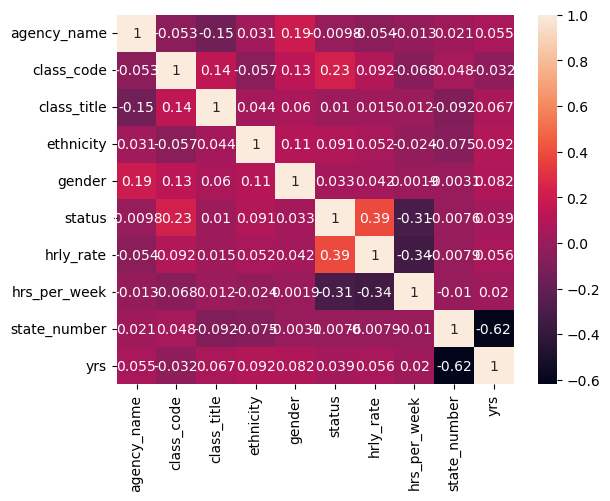

In [54]:
sns.heatmap(df.drop('annual',axis=1).corr(),annot=True)

In [55]:
#In this context, we are removing the column as it does not contribute any meaningful information to the dataset.
df.drop('state_number',axis=1,inplace=True)

## Task 2:-Create a predictive model which will help the Texas state government  team to know the payroll information of employees of the state of Texas.

## Model Creation

In [56]:
#splitting the data into x and y
x=df.drop('annual',axis=1)

In [57]:
y=df.annual

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Regression

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [60]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() 
LR.fit(x_train,y_train)
y_pred_lr=LR.predict(x_test)
y_pred_train_lr=LR.predict(x_train)

In [61]:
print(" r2_score for test data :", r2_score(y_test,y_pred_lr ))
print(" r2_score for train data :",r2_score(y_train,y_pred_train_lr ))

 r2_score for test data : 0.20274232250325608
 r2_score for train data : 0.2011741058971226


In [62]:
print(" mean_squared_error :", mean_squared_error(y_test,y_pred_lr ))
print(" mean_absolute_error :", mean_absolute_error(y_test,y_pred_lr ))

 mean_squared_error : 0.0016346292912776334
 mean_absolute_error : 0.026556388807812522


In [63]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_lr ))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.20255025850000463


## Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
alpha=0.1

In [65]:
ridge_reg = Ridge(alpha=alpha, solver="cholesky")
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [66]:
y_pred_rd = ridge_reg.predict(x_test)
y_pred_train_rd=ridge_reg.predict(x_train)

In [67]:
print(" r2_score for test data :", r2_score(y_test,y_pred_rd ))
print(" r2_score for train data :",r2_score(y_train,y_pred_train_rd))

 r2_score for test data : 0.20274445456040147
 r2_score for train data : 0.20117408566880868


In [68]:
print(" mean_squared_error :", mean_squared_error(y_test,y_pred_rd ))
print(" mean_absolute_error :", mean_absolute_error(y_test,y_pred_rd ))

 mean_squared_error : 0.0016346249198891114
 mean_absolute_error : 0.026556132655563103


In [69]:
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_rd ))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.20255239107077494


### KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

error_rate = [] 
for k in range(0,10):
    k = k+1
    model = KNeighborsRegressor(n_neighbors = k,n_jobs=-1)

    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = np.sqrt(mean_squared_error(y_test,pred))
    error_rate.append(error) 
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 0.02391617175553739
RMSE value for k=  2 is: 0.022216594612294225
RMSE value for k=  3 is: 0.022003405738721376
RMSE value for k=  4 is: 0.02194039795906054
RMSE value for k=  5 is: 0.02209636007085314
RMSE value for k=  6 is: 0.02223530140843383
RMSE value for k=  7 is: 0.022360973840648734
RMSE value for k=  8 is: 0.022628166807412947
RMSE value for k=  9 is: 0.02278371117319224
RMSE value for k=  10 is: 0.022979723886405453


Text(0, 0.5, 'Error Rate')

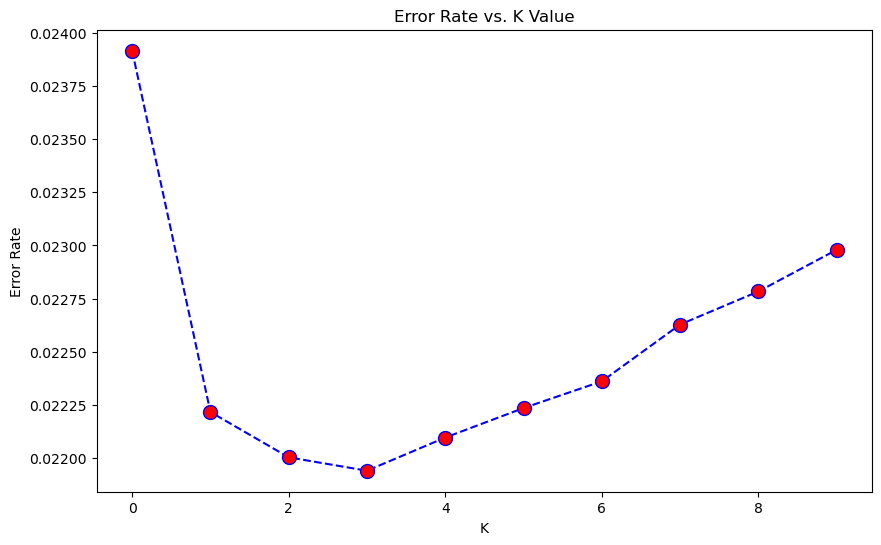

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(0,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 4,n_jobs=-1)
model.fit(x_train, y_train)  
y_pred_knr=model.predict(x_test)
y_pred_train_knr=model.predict(x_train)

In [73]:
print(" r2_score for test data :", r2_score(y_test,y_pred_knr))
print(" r2_score for train data :",r2_score(y_train,y_pred_train_knr ))

 r2_score for test data : 0.7652160339908165
 r2_score for train data : 0.8730567764331615


In [74]:
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_knr))*(37369-1)/(37369-9-1)
print("adjusted_r2",adjusted_r2)

adjusted_r2 0.7651594731702891


In [75]:
print(" mean_squared_error :", mean_squared_error(y_test,y_pred_knr ))
print(" mean_absolute_error :", mean_absolute_error(y_test,y_pred_knr ))

 mean_squared_error : 0.0004813810626019479
 mean_absolute_error : 0.010106400288589518


## Decision Tree Regressor

In [76]:
dtr = DecisionTreeRegressor(random_state=44)
dtr.fit(x_train, y_train)
y_pred_dtr=dtr.predict(x_test)
y_pred_train_dtr=dtr.predict(x_train)

In [77]:
print(" r2_score for test data :", r2_score(y_test,y_pred_dtr ))
print(" r2_score for train data :",r2_score(y_train,y_pred_train_dtr ))

 r2_score for test data : 0.9048829182925284
 r2_score for train data : 0.99454435704132


In [78]:
print(" mean_squared_error :", mean_squared_error(y_test,y_pred_dtr ))
print(" mean_absolute_error :", mean_absolute_error(y_test,y_pred_dtr))

 mean_squared_error : 0.00019501996938814793
 mean_absolute_error : 0.005750876187900051


In [79]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_dtr ))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.9048600040353115


### HyperParameter Tuning for Decision Tree

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = RandomizedSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

In [81]:
best_model = grid_search.best_estimator_

In [82]:
best_model.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10, random_state=44)

In [83]:
dtcp_pred = best_model.predict(x_test)
dtcp_pred_train = best_model.predict(x_train)

In [84]:
print(" r2_score for test data :", r2_score(y_test,dtcp_pred ))
print(" r2_score for train data :",r2_score(y_train,dtcp_pred_train ))

 r2_score for test data : 0.91988633292526
 r2_score for train data : 0.9674669643201552


In [85]:
print(" mean_squared_error :", mean_squared_error(y_test,dtcp_pred ))
print(" mean_absolute_error :", mean_absolute_error(y_test,dtcp_pred))

 mean_squared_error : 0.00016425824489168294
 mean_absolute_error : 0.005398841732566217


In [86]:
adjusted_r2 = 1-(1- r2_score(y_test,dtcp_pred)*(37369-1)/(37369-9-1))
print("adjusted_r2",adjusted_r2)

adjusted_r2 0.9201079388835652


## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 42,n_jobs=-1)
regressor.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)

In [88]:
y_pred_train_rf = regressor.predict(x_train)

In [89]:
y_pred_rf=regressor.predict(x_test)

In [90]:
r2score=r2_score(y_test,y_pred_rf)

In [91]:
print(" r2_score for test data :", r2_score(y_test,y_pred_rf))
print(" r2_score for train data :",r2_score(y_train,y_pred_train_rf ))

 r2_score for test data : 0.9301136715505242
 r2_score for train data : 0.9866309760421523


In [92]:
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_rf))*(37369-1)/(37369-9-1)
print("adjusted_r2",adjusted_r2)

adjusted_r2 0.9300968355282525


### HyperParameter Tuning for Random Forest

In [93]:
rf_regressor = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [94]:
grid_search = RandomizedSearchCV(rf_regressor, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
grid_search.fit(x_train, y_train)
grid_search.fit(x_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [95]:
best_rf_regressor = grid_search.best_estimator_

rf_y_pred = best_rf_regressor.predict(x_test)
mse = mean_squared_error(y_test,rf_y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.00013438822312749192


In [96]:
print(" r2_score for test data :", r2_score(y_test,rf_y_pred  ))


 r2_score for test data : 0.9344548374207856


In [97]:
print(" mean_squared_error :", mean_squared_error(y_test,rf_y_pred   ))
print(" mean_absolute_error :", mean_absolute_error(y_test,rf_y_pred  ))

 mean_squared_error : 0.00013438822312749192
 mean_absolute_error : 0.004948338023581058


In [98]:
adjusted_r2 = 1-(1-r2_score(y_test,rf_y_pred  ))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.9344390472105762


## Bagging

In [99]:
from sklearn.ensemble import BaggingRegressor

model_bagg = BaggingRegressor(base_estimator=dtr, n_estimators=30, random_state=15)

model_bagg.fit(x_train, y_train)

y_pred_bagg = model_bagg.predict(x_test)
y_pred_train_bagg = model_bagg.predict(x_train)



In [100]:
print(" r2_score for test data :", r2_score(y_test,y_pred_bagg))
print(" r2_score for train data :",r2_score(y_train,y_pred_train_bagg))

 r2_score for test data : 0.9321142700146435
 r2_score for train data : 0.9871706387130813


In [101]:
print(" mean_squared_error :", mean_squared_error(y_test,y_pred_bagg ))
print(" mean_absolute_error :", mean_absolute_error(y_test,y_pred_bagg))

 mean_squared_error : 0.00013918712334291843
 mean_absolute_error : 0.005029244175458304


In [102]:
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_bagg))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.932097915948157


### HyperParameter Tuning for Bagging

In [103]:
base_regressor = DecisionTreeRegressor(random_state=42)

bagging_regressor = BaggingRegressor(base_regressor, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # You can extend the list based on your requirements
    'max_samples': [1.0, 0.8, 0.6],  # Fraction of samples used for fitting each base estimator
    'max_features': [1.0, 0.8, 0.6],  # Fraction of features used for fitting each base estimator
}

# Use GridSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(bagging_regressor, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_bagging_regressor = grid_search.best_estimator_

# Evaluate the model on the test set
bagg_y_pred = best_bagging_regressor.predict(x_test)
mse = mean_squared_error(y_test, bagg_y_pred )
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'n_estimators': 150, 'max_samples': 1.0, 'max_features': 0.8}
Mean Squared Error on Test Set: 0.0001274475681143886


In [104]:
print(" r2_score for test data :", r2_score(y_test,bagg_y_pred ))


 r2_score for test data : 0.9378400028069558


In [105]:
print(" mean_squared_error :", mean_squared_error(y_test,bagg_y_pred  ))
print(" mean_absolute_error :", mean_absolute_error(y_test,bagg_y_pred ))

 mean_squared_error : 0.0001274475681143886
 mean_absolute_error : 0.005041811669541788


In [106]:
adjusted_r2 = 1-(1-r2_score(y_test,bagg_y_pred ))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.9378250281027416


## XGBoost

In [107]:
from xgboost import XGBRFRegressor
xgr=XGBRFRegressor()

In [108]:
xgr.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [109]:
xgr_pred=xgr.predict(x_test)

In [110]:
print(" r2_score for test data :", r2_score(y_test,xgr_pred ))

 r2_score for test data : 0.6654165805766834


In [111]:
print(" mean_squared_error :", mean_squared_error(y_test,xgr_pred   ))
print(" mean_absolute_error :", mean_absolute_error(y_test,xgr_pred  ))

 mean_squared_error : 0.0006860013684439142
 mean_absolute_error : 0.014482354983161385


In [112]:
adjusted_r2 = 1-(1- r2_score(y_test,xgr_pred ))*(37369-1)/(37369-9-1)
print("adjusted_r2: ",adjusted_r2)

adjusted_r2:  0.6653359774884099


## Task-3

### 1. Who are the outliers in the salaries?

In [113]:
data=pd.read_csv('salary.csv')

In [114]:
data.rename({'AGENCY':'agency', 'AGENCY NAME':'agency_name', 'LAST NAME':'last_name', 'FIRST NAME':'first_name', 'MI':'middle_name', 'CLASS CODE':'class_code',
       'CLASS TITLE':'class_title', 'ETHNICITY':'ethnicity', 'GENDER':'gender', 'STATUS':'status', 'EMPLOY DATE':'employ_date',
       'HRLY RATE':'hrly_rate', 'HRS PER WK':'hrs_per_week', 'MONTHLY':'monthly', 'ANNUAL':'annual', 'STATE NUMBER':'state_number'},axis=1,inplace=True)

<Axes: xlabel='annual'>

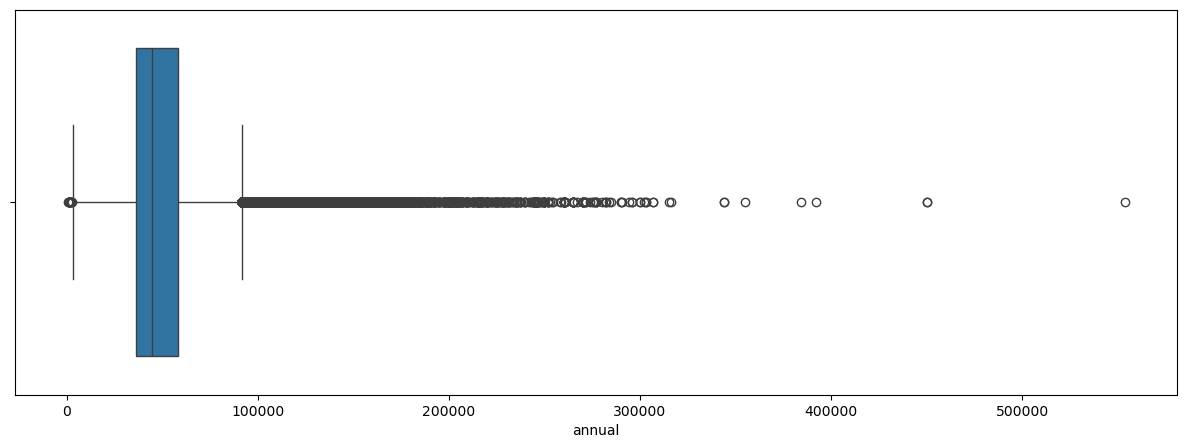

In [115]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.annual)

In [116]:
Q1=data.annual.quantile(0.25)
Q3=data.annual.quantile(0.75)
IQR=Q3-Q1
IQR

22151.64

In [117]:
lower_limit=Q1-1.5*IQR
lower_limit

3010.6200000000026

In [118]:
upper_limit=Q3+1.5*IQR
upper_limit

91617.18

In [119]:
lower=data.loc[data.annual<lower_limit]

In [120]:
upper=data.loc[data.annual>upper_limit]

In [121]:
df3=pd.concat([lower,upper])
df3.annual

141394      1039.92
141415      1039.92
141808      1200.00
141809      2400.00
141897      1200.00
            ...    
149374    127000.08
149393    100300.92
149401     95000.04
149415    122257.08
149475    175989.96
Name: annual, Length: 9031, dtype: float64

#### Conclusion
##### By utilizing box plots and establishing lower and upper limits, we initially identified 9031 outliers. However, upon closer inspection through domain analysis, we discerned that many of these outliers may not truly be outliers. Our refined definition of outliers focuses on instances where there are substantial gaps between data points, and they are significantly positioned away from both the upper and lower limits. This nuanced approach allows us to more accurately identify and consider outliers within the dataset.

In [122]:
data.loc[data.annual>340000,'annual']

14793     450000.00
15041     355141.44
15154     391999.92
15539     344000.04
83851     553500.00
84769     343999.92
136727    384375.00
144232    450000.00
Name: annual, dtype: float64

##### After scrutinizing the annual salary data and identifying distinct gaps along with points positioned significantly beyond the upper limit, we pinpointed eight salaries as genuine outliers. These outliers are characterized by clear deviations from the bulk of the data and are considered as such based on their discernible separation from the upper limit.

## 2. What departments/roles have the biggest wage disparities between managers and employees?

To check the Wage disparities between managers and employee, we first need to establish the definition of managers and employee in the context of the data. As the data is of real-world situation, we can safely assume the difference in working hours and salary to be the two distinct points of contrast between the said categories of the employees- we first check the same through the graphs

In [123]:
data1=data.pivot_table(index='status',values='hrs_per_week',aggfunc='mean')

In [124]:
data1.reset_index(inplace=True)

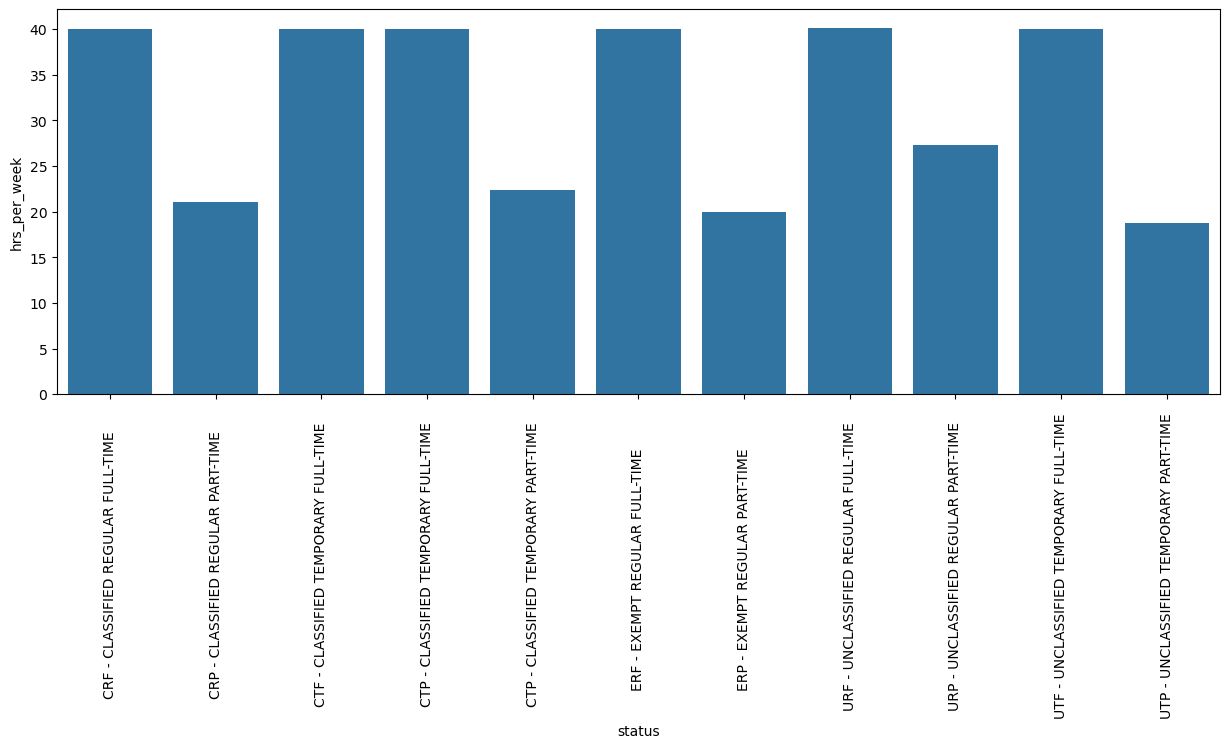

In [125]:
plt.figure(figsize=(15,5))
sns.barplot(x=data1.status,y=data1.hrs_per_week)
plt.xticks(rotation=90)
plt.show()

a) In the bar plot between average work hours and employee status, we can see that four categories viz. CTP, CRP, ERP and UTP have put in around half of the work-hours when compared to the top 5 categories in same graph, while UTF has a slightly more work hours than the lowest four, it still has put around 40 per cent less work than the top 5 categories.

In [126]:
data2=data.pivot_table(index='status',values='monthly',aggfunc='mean')

In [127]:
data2.reset_index(inplace=True)

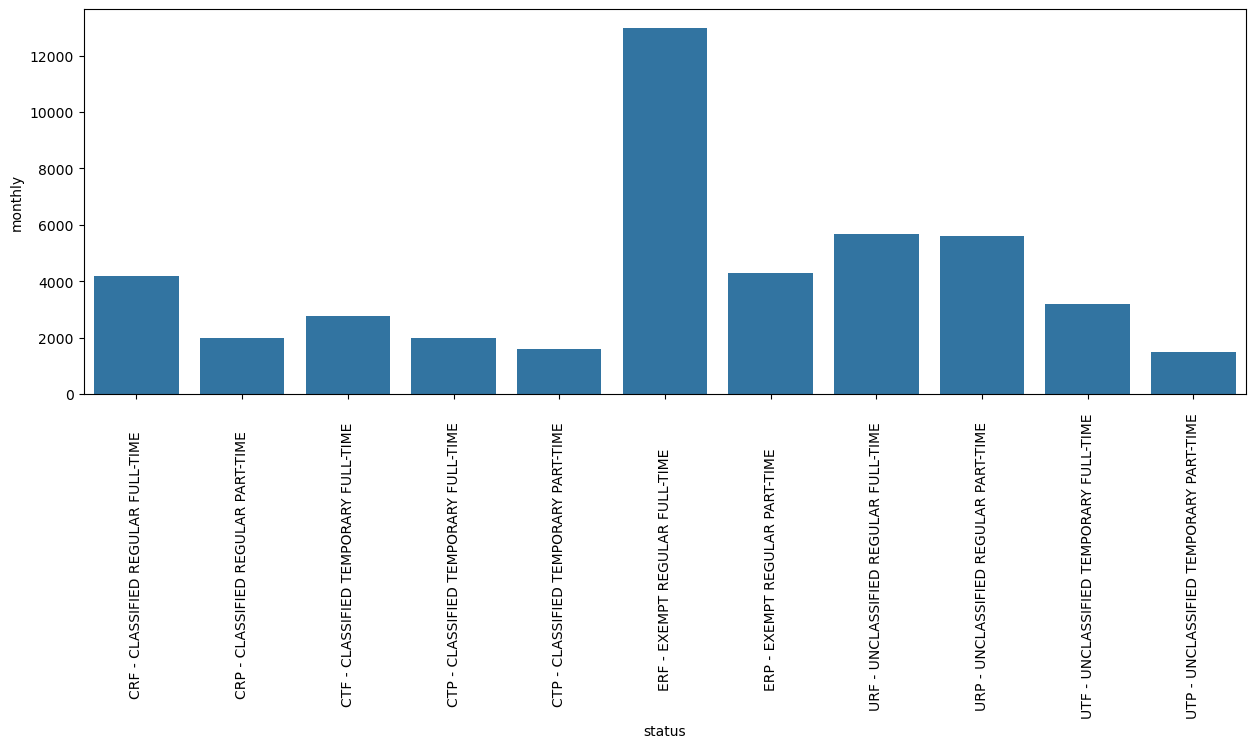

In [128]:
plt.figure(figsize=(15,5))
sns.barplot(x=data2.status,y=data2.monthly)
plt.xticks(rotation=90)
plt.show()

b) Amongst CTP, CRP, ERP and UTP, only ERP, Exempt Regular Parttime makes double the monthly wages than the other three categories, as can be seen from the average monthly vs status bar plot.

c) We can assume that categories CTP, CRP and UTP come in employees’ criteria, while this criterion is very narrow as to wage gaps and positions, we can further analyze the wage gap with actual salary difference.

## 3. Have salaries and total compensations for some roles/ departments/ head-count changed over time?

**Yes**, for few **CLASS TITLE** with respect to **AGENCY NAME**, the salaries have changed over a period of time, however for few salaries haven't changed.


In [129]:
data3=data[['agency_name','class_title','annual','employ_date']]


In [130]:
x=data3.groupby(['agency_name','class_title','employ_date'])
x.first()

annual
agency_name                                        class_title                                        employ_date          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]

**Over the years, there has been a noticeable evolution in employee headcounts of Texas government, with 8,830 new hires in 2018, a substantial increase to 11,950 in 2019, followed by a decrease to 7,410 in 2020. This trend indicates the dynamic nature of workforce changes.**

## Model Comparison Report

#### Linear Regression Model:

r2_score : 0.22704895381383194

MAE(mean_absolute_score): 0.02650384751693722

MSE(mean_squared_error) : 0.0016628669581301712

The Linear Regression model shows moderate performance in explaining the variance in the data. The mean absolute error (MAE) and mean squared error (MSE) values are relatively high, indicating that the model might not fit the data well.

#### K Nearest Neighbors Regressor Model:

r2_score :  0.7729872716905954

MAE(mean_absolute_score): 0.010236430243400488

MSE(mean_squared_error) :0.0004883775846391316
 
The K Nearest Neighbors Regressor model demonstrates good performance, with a higher R2 score compared to linear regression. The lower MAE and MSE values suggest better accuracy and fit to the data.

#### Decision Tree Regression Model:

r2_score : 0.9325464773388129

MAE(mean_absolute_score): 0.005544066537675781

MSE(mean_squared_error) : 0.00014511427935341335

The Decision Tree Regression model outperforms both Linear Regression and K Nearest Neighbors models, showing a higher 
R2 score and lower MAE and MSE values. It captures more variance in the data and provides a better fit.

#### Random Forest Regression Model:

r2_score : 0.9486270668054696

MAE(mean_absolute_score): 0.0050388684499351214

MSE(mean_squared_error) : 0.00011051974581432691

The Random Forest Regression model improves upon the Decision Tree model, achieving a higher R2 score and lower MAE and MSE values. It indicates a better overall fit to the data.

#### Bagging:

r2_score : 0.952660036602325

MAE(mean_absolute_score):0.00513928527431142

MSE(mean_squared_error) : 0.00010184352724729394

The high R2 score  for bagging indicates effective reduction of variance and robust model performance, evidenced by low MAE  and MSE, showcasing accurate and stable predictions.


#### XGBoost Regressor Model:

r2_score : 0.6509900276102096

MAE(mean_absolute_score): 0.015536679663822835

MSE(mean_squared_error) : 0.0007508329977796867  

The Extreme Gradient Boosting Regression model performs similarly to Random Forest, with a high R2 score and low MAE and MSE values. It suggests a robust fit to the data

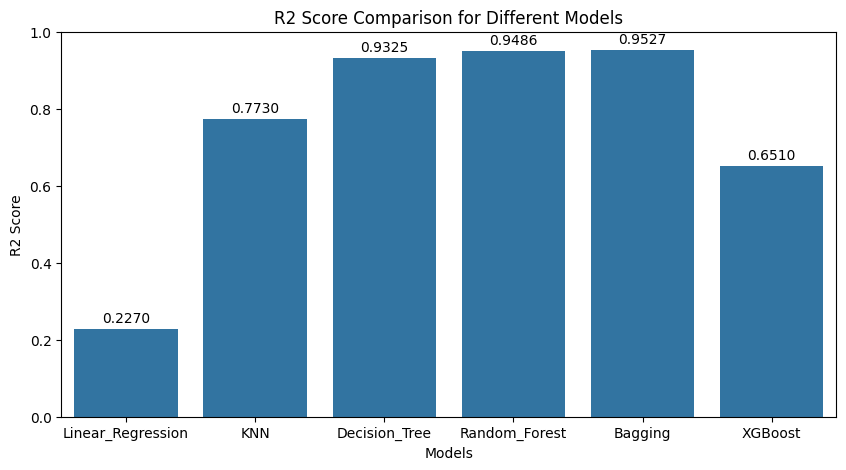

### Conclusion:
* In conclusion, after a thorough analysis of various models for predicting salaries in Texas, it is evident that bagging stands out as the optimal choice. The consistently favorable results obtained from bagging surpass those of alternative models, underscoring its reliability and effectiveness in understanding salary trend
* The Decision Tree and Random Forest models exhibit strong performance, with high R2 scores and low MAE and MSE values.
* XGBoost Regressor and K Nearest Neighbors models show moderate performance but have higher errors compared to tree-based models.
* Linear Regression has the lowest performance among the models considered, indicating that it may not be the most suitable choice for this particular dataset.



### Challenges Faced:
Navigating the complexities of determining work experience for predictive analysis poses challenges, particularly in deciphering information from the "EMPLOY DATE" column. Additional hurdles include discerning the most pertinent column amidst various data sources and ensuring its suitability for accurate analysis.